In [1]:
from pathlib import Path
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

agent_folder = Path('../out/ssl_agent')

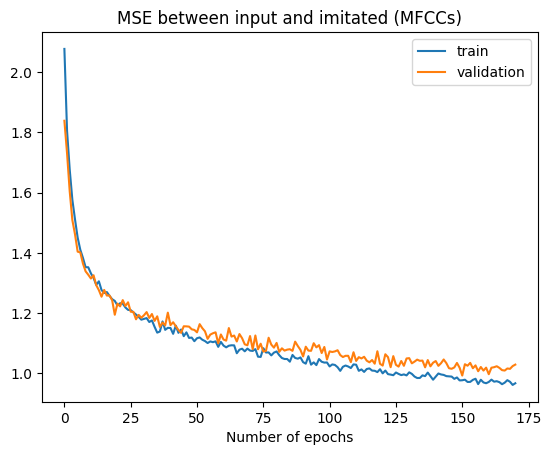

In [2]:
# MFCC baseline
agent_name = 'mfcc_delta_delta2_mse'
agent_path = agent_folder / agent_name
with open("%s/metrics.pickle" % agent_path, "rb") as f:
    metrics = pickle.load(f)
plt.plot(metrics['train']['inverse_loss'], label='train')
plt.plot(metrics['validation']['inverse_loss'], label='validation')

plt.xlabel('Number of epochs')
plt.title('MSE between input and imitated (MFCCs)')
plt.legend()
plt.savefig('/home/engaclew/agent/out/ssl_agent/mfcc_losses.png', dpi=300)

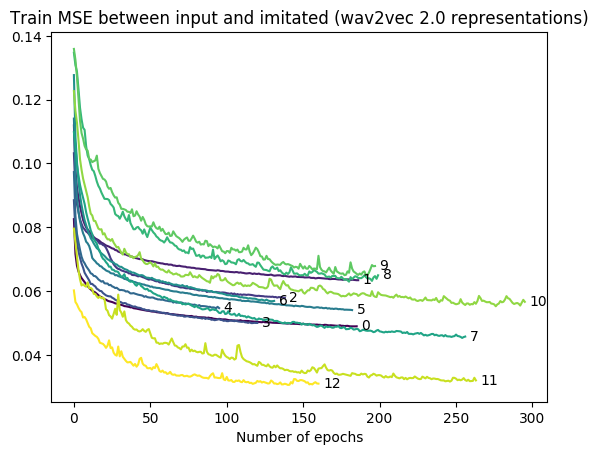

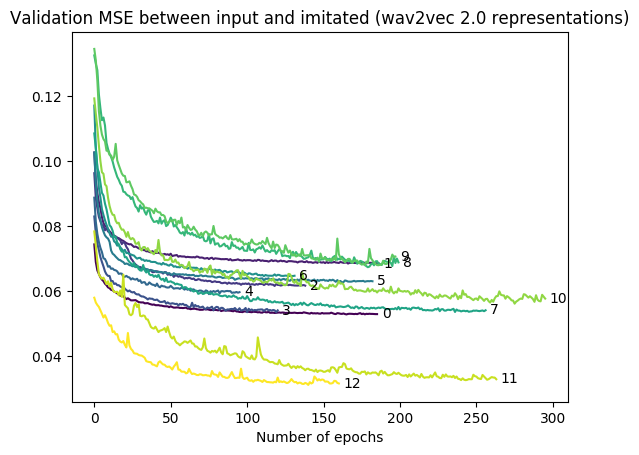

In [4]:
# wav2vec 2.0

# Train loss
colors = cm.viridis(np.linspace(0, 1, 13))
for i in range(0, 13):
    agent_name = f'test_layer_{i}_mse'
    agent_path = agent_folder / agent_name
    with open("%s/metrics.pickle" % agent_path, "rb") as f:
        metrics = pickle.load(f)
    plt.plot(metrics['train']['inverse_loss'], label=i, color=colors[i])
    plt.text(x=len(metrics['train']['inverse_loss'])+2, y=metrics['train']['inverse_loss'][-1], s=i,
            verticalalignment='center', horizontalalignment='left')

plt.xlabel('Number of epochs')
plt.title('Train MSE between input and imitated (wav2vec 2.0 representations)')
plt.savefig('/home/engaclew/agent/out/ssl_agent/wav2vec_train_losses.png', dpi=300)
plt.show()

# Validation loss
colors = cm.viridis(np.linspace(0, 1, 13))
for i in range(0, 13):
    agent_name = f'test_layer_{i}_mse'
    agent_path = agent_folder / agent_name
    with open("%s/metrics.pickle" % agent_path, "rb") as f:
        metrics = pickle.load(f)
    plt.plot(metrics['validation']['inverse_loss'], label=i, color=colors[i])
    plt.text(x=len(metrics['validation']['inverse_loss'])+2, y=metrics['validation']['inverse_loss'][-1], s=i,
            verticalalignment='center', horizontalalignment='left')

plt.xlabel('Number of epochs')
plt.title('Validation MSE between input and imitated (wav2vec 2.0 representations)')
plt.savefig('/home/engaclew/agent/out/ssl_agent/wav2vec_val_losses.png', dpi=300)
plt.show()